# 🎯 Template Matching in OpenCV

## Overview
This notebook is part of my **OpenCV learning roadmap**.

The goal is to demonstrate **template matching**, a technique to locate a sub-image (template) inside a larger image using  different OpenCV matching methods to compare and visualize results.   


## Objectives
- Load the main image and template image in **grayscale**.
- Apply **six different template matching methods** in OpenCV.
- Compare results visually to see how each method performs.

## Key Learnings
- **Template Matching** is used to find small objects in a larger image by sliding the template over the source image and calculating a similarity score.
- OpenCV provides multiple matching methods:
  - `cv2.TM_CCOEFF`
  - `cv2.TM_CCOEFF_NORMED`
  - `cv2.TM_CCORR`
  - `cv2.TM_CCORR_NORMED`
  - `cv2.TM_SQDIFF`
  - `cv2.TM_SQDIFF_NORMED`
- The best location for the template depends on the method:
  - For **SQDIFF** methods → minimum value is best.
  - For other methods → maximum value is best.
- Detected template is highlighted with a **rectangle**.

## Tools & Libraries
- **OpenCV** – for image loading, resizing, grayscale conversion, template matching, and rectangle drawing.
- **Matplotlib** – for visualizing images and results.
- **NumPy** – for image data handling.

---


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load and resize images in grayscale
img = cv2.imread('./data/soccer_practice.jpg', 0)
img = cv2.resize(img, (0, 0), fx=0.8, fy=0.8)
template = cv2.imread('./data/ball.PNG', 0)
template = cv2.resize(template, (0, 0), fx=0.8, fy=0.8)

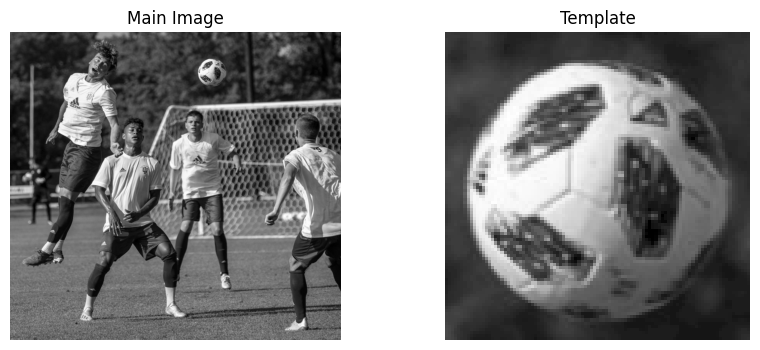

In [3]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Main Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(template, cmap='gray')
plt.title("Template")
plt.axis('off')

plt.show()


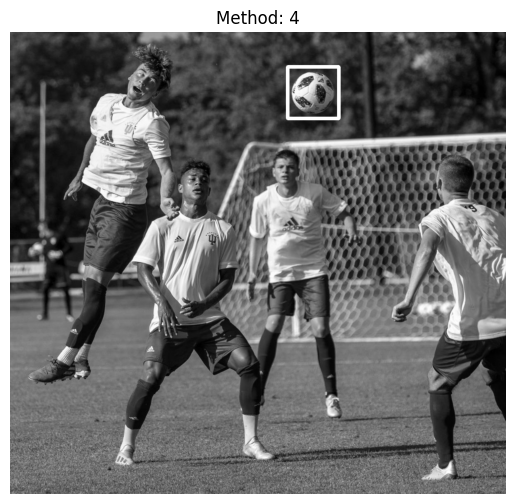

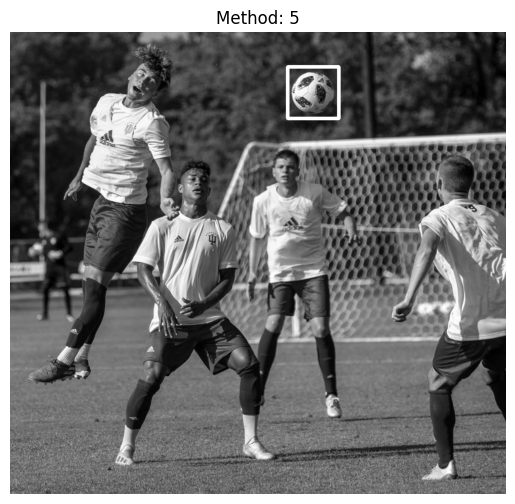

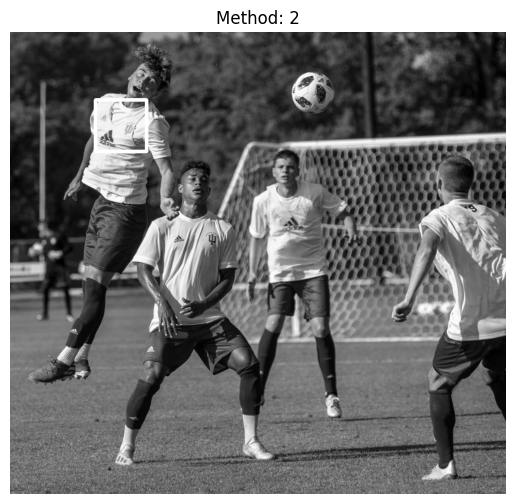

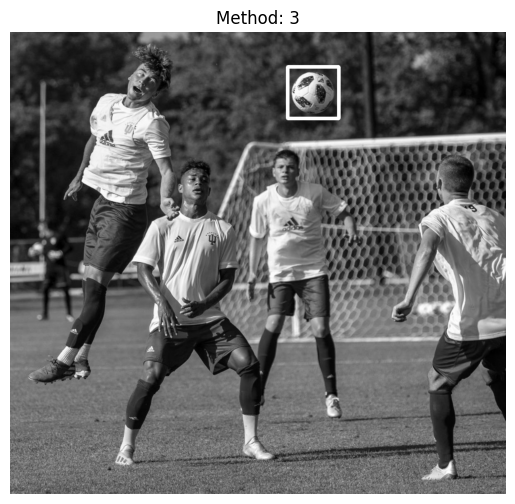

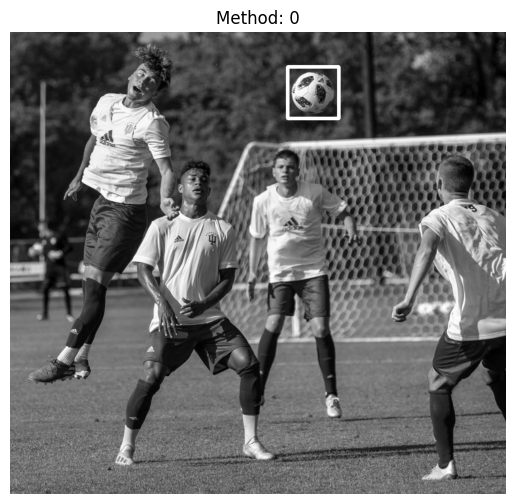

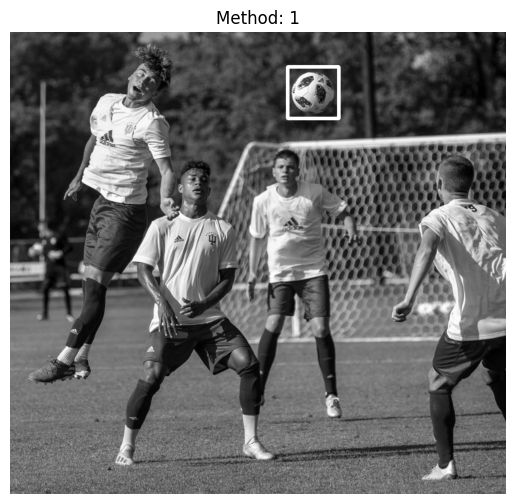

In [4]:
h, w = template.shape

methods = [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
           cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]

for method in methods:
    img2 = img.copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)    
    cv2.rectangle(img2, location, bottom_right, 255, 5)

    plt.figure(figsize=(8,6))
    plt.title(f"Method: {method}")
    plt.imshow(img2, cmap='gray')
    plt.axis('off')
    plt.show()